# Dataset Link: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
df= pd.read_csv("IRIS.csv")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(df.shape)

(150, 5)


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
df["species"].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


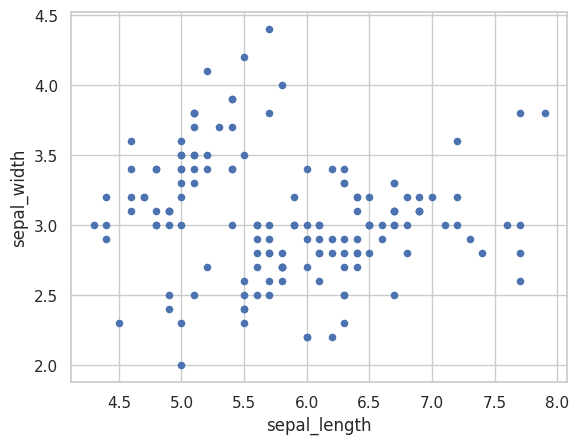

In [ ]:
df.plot(kind='scatter', x= 'sepal_length', y='sepal_width');

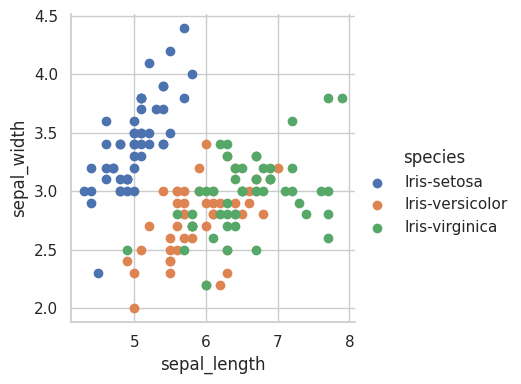

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="species", height=4) \
   .map(plt.scatter, "sepal_length","sepal_width") \
   .add_legend();
plt.show();

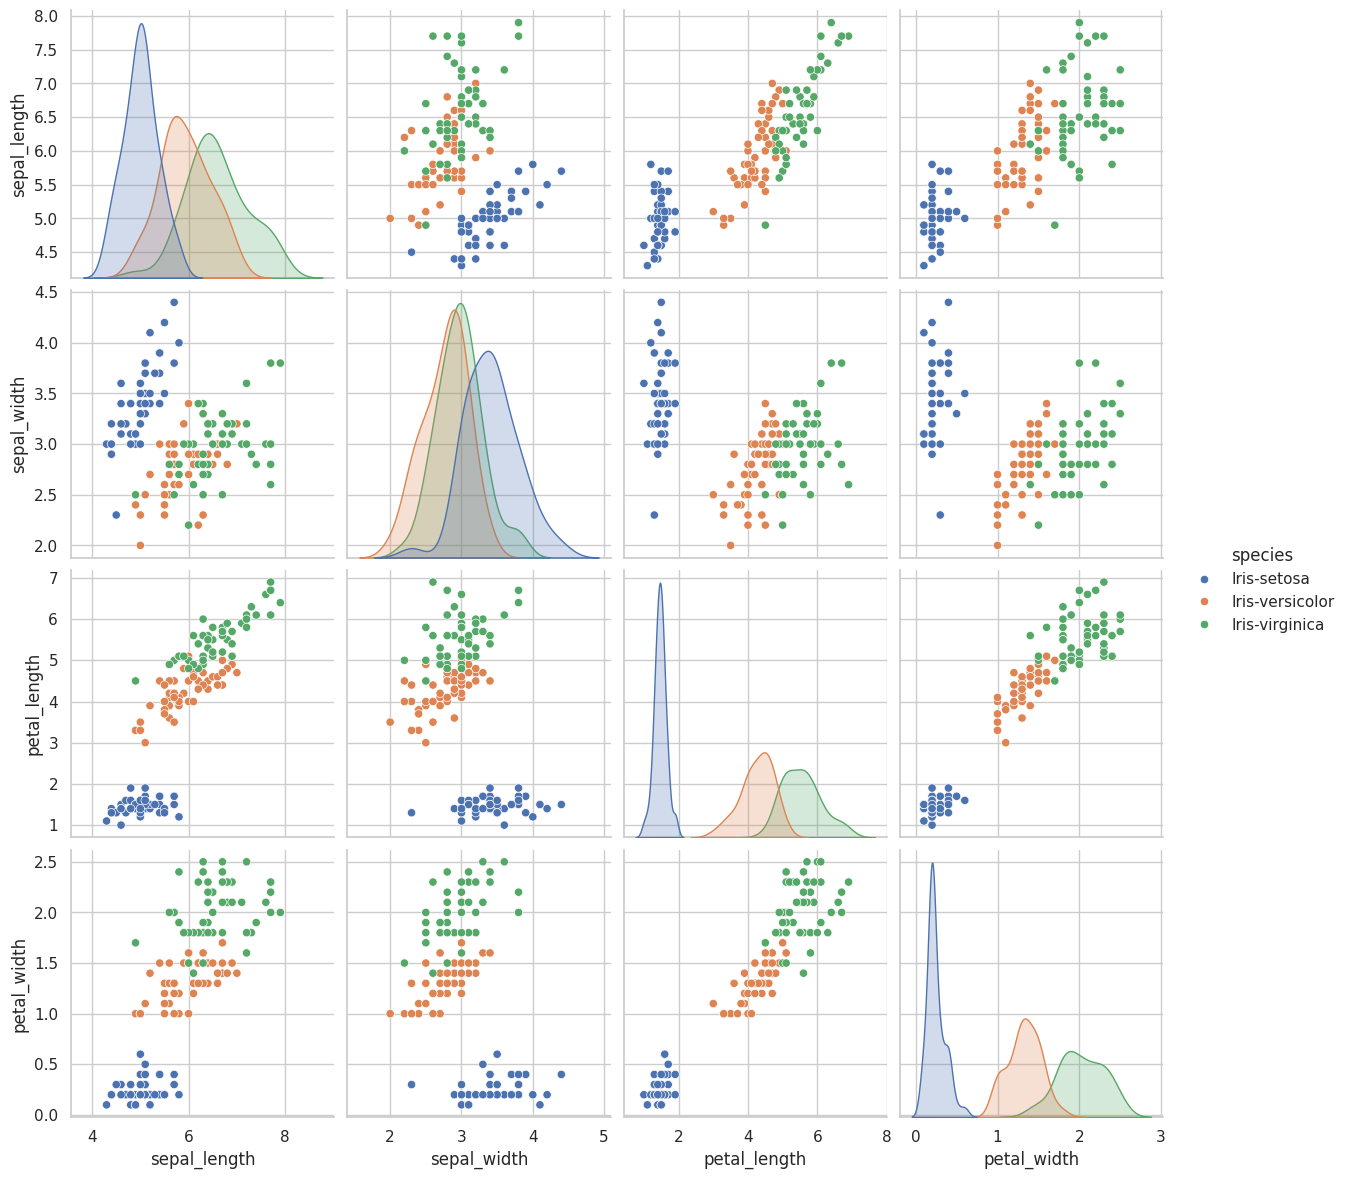

In [ ]:
sns.pairplot(df, hue="species", height=3, diag_kind="kde");
plt.show()

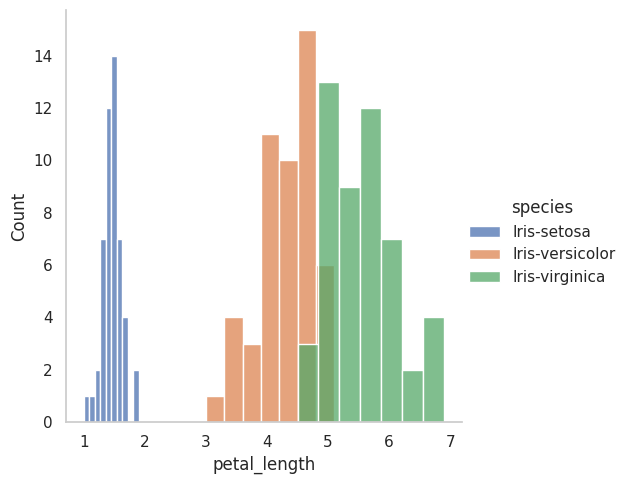

In [ ]:

sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.histplot, "petal_length") \
   .add_legend();
plt.grid()
plt.show()


In [ ]:
from seaborn import displot

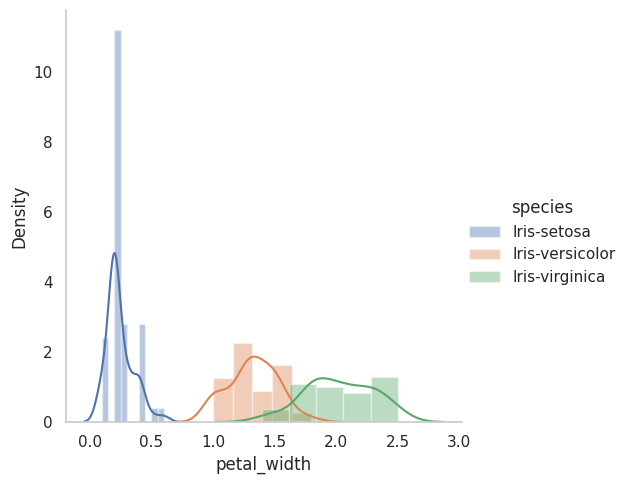

In [ ]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend()
plt.grid()
plt.show()

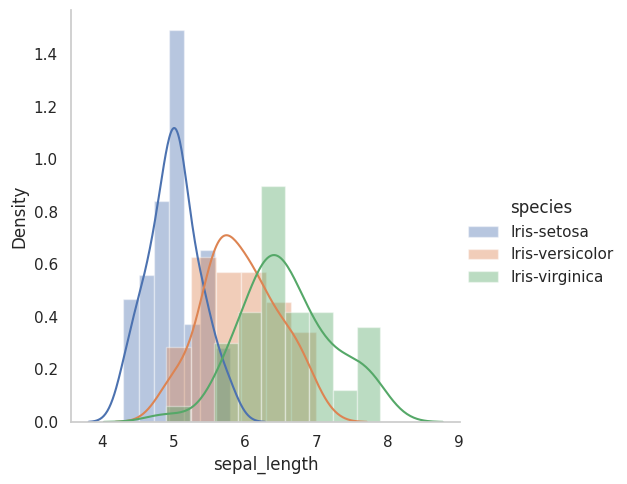

In [ ]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend()
plt.grid()
plt.show()

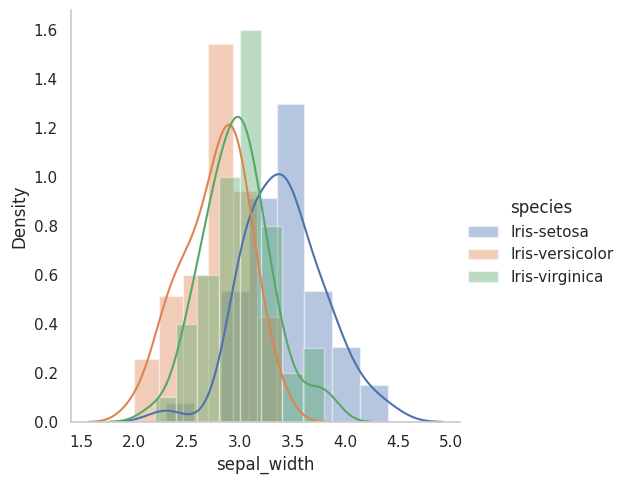

In [ ]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend()
plt.grid()
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


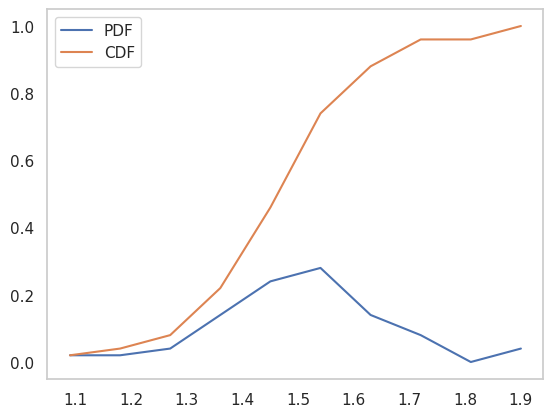

In [ ]:
iris_setosa = df.loc[df["species"] == "Iris-setosa"]
iris_virginica = df.loc[df["species"] == "Iris-virginica"]
iris_versicolor = df.loc[df["species"] == "Iris-versicolor"]
counts, bin_edges = np.histogram(iris_setosa["petal_length"], bins=10)

counts, bin_edges = np.histogram(iris_setosa["petal_length"], bins=10)
pdf = counts / (sum(counts))

print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print("Means:")
print(np.mean(iris_setosa["petal_length"]))

print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:")
print(np.std(iris_setosa["petal_length"]));
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


In [ ]:
print("Medians:")
print(np.median(iris_setosa["petal_length"]))

print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))

print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)));
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90));
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"],90))

from statsmodels import robust
print("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))

Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


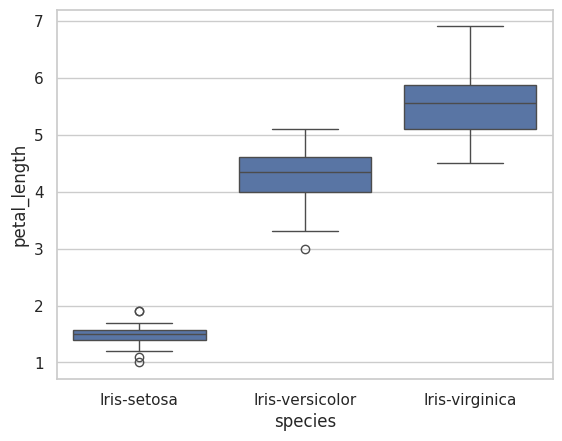

In [ ]:
sns.boxplot(x='species', y='petal_length', data=df)
plt.show()

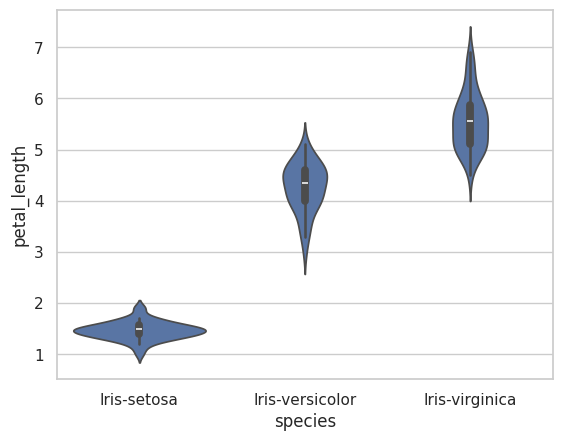

In [ ]:
sns.violinplot(x='species', y='petal_length', data=df)
plt.show()

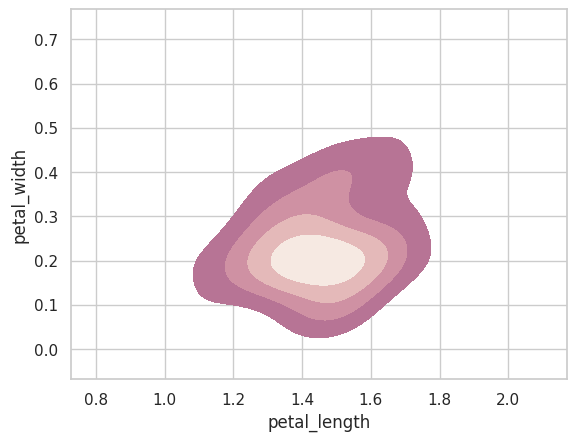

In [ ]:
sns.set(style="whitegrid")
cmap = sns.cubehelix_palette(as_cmap=True, dark=0.5, light=1, reverse=True)
sns.kdeplot(x='petal_length', y='petal_width', data=iris_setosa, cmap=cmap, fill=True, levels=5, thresh=0.2)

plt.show()

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df["species"].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df["species"]=df["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
label_name=["Iris-setosa","Iris-versicolor","Iris-virginica"]

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
X=df.drop(columns="species",axis=1)
y=df["species"]

In [ ]:
y.shape

(150,)

In [ ]:
logistic_model = LogisticRegression()
svm_model = SVC(probability=True)
random_forest_model = RandomForestClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model.fit(X_train,y_train)
pred2=svm_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred2)}")

Accuracy Score : 1.0


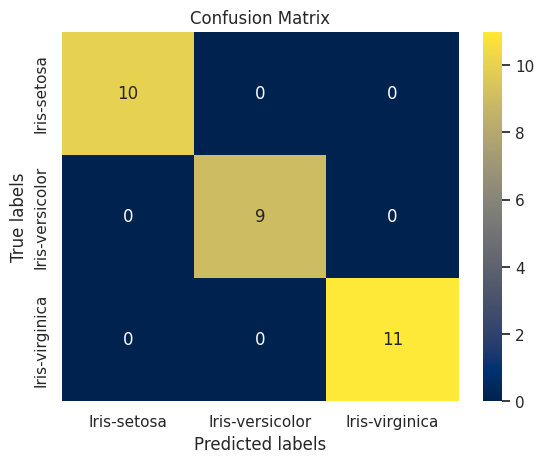

In [ ]:
cf=confusion_matrix(y_test,pred2)
sns.heatmap(cf,annot=True,cmap="cividis",xticklabels=label_name,yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
print(classification_report(y_test,pred2,target_names=label_name))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



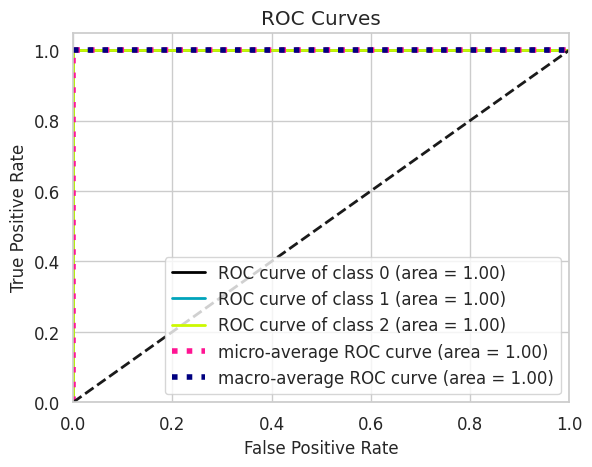

In [ ]:
y_probas = svm_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()